<h1 style="text-align:center;">Лабораторна робота 4</h1>

<p><b>Тема:</b> OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version) </p>
<p><b>Мета:</b> знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.</p>
<h2 style="text-align:center;">Завдання для самостійної роботи</h2>

<a href="https://www.geeksforgeeks.org/python/negative-transformation-of-an-image-using-python-and-opencv/">1. Негатив</a>

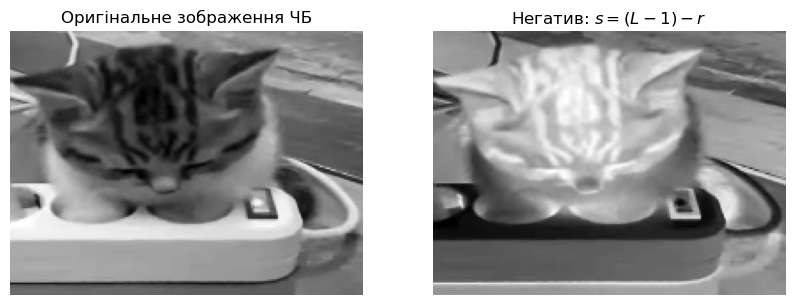

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'src/Color.png' 
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Нема зображення! {image_path}")
else:
    image_negative = cv.bitwise_not(image_gray)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне зображення ЧБ")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_negative, cmap='gray')
    plt.title(r'Негатив: $s = (L - 1) - r$')
    plt.axis('off')
    plt.show()
 
    cv.imwrite('src/Color_negative.png', image_negative)

<a href="https://www.geeksforgeeks.org/python/log-transformation-of-an-image-using-python-and-opencv/">2. Логарифмічні перетворення</a>

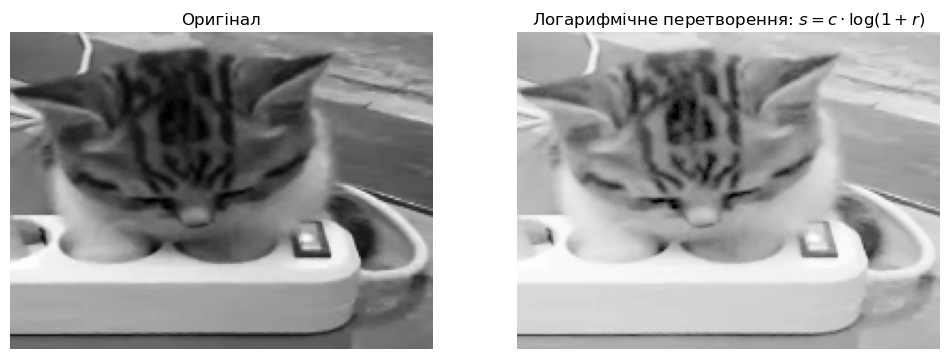

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'src/Color.png' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Помилка: Нема зображення {image_path}")
else:
    c = 255 / np.log(1 + 255)
    
    log_image = c * np.log1p(image_gray.astype(np.float64))
    
    image_log = np.array(log_image, dtype=np.uint8)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_log, cmap='gray')
    plt.title(r'Логарифмічне перетворення: $s = c \cdot \log(1 + r)$')
    plt.axis('off')

    plt.show()
    
    cv.imwrite('src/Color_log_transform.png', image_log)

<a href="https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html">3. Степенева(гамма-корекція)</a>

Формула градаційного перетворення для Степеневої (гамма-корекції):s = c * r^gamma


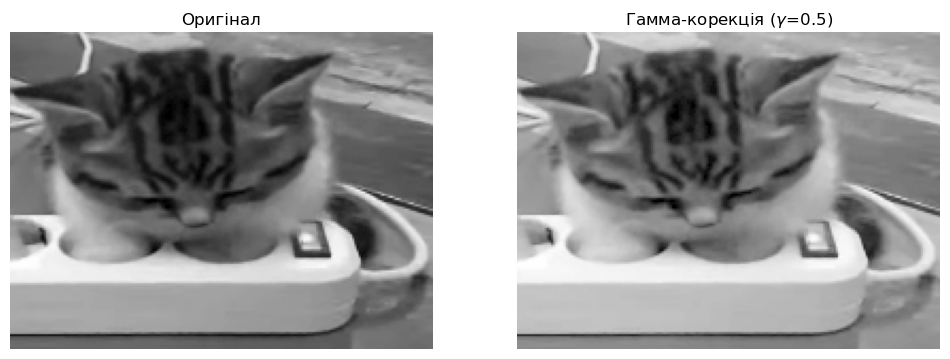

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'src/Color.png' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Нема зображення! {image_path}")
else:
    gamma = 0.5 

    image_norm = image_gray.astype(np.float64) / 255.0
    image_gamma_corrected = np.power(image_norm, gamma)
    image_gamma = np.array(image_gamma_corrected * 255, dtype=np.uint8)

    print("Формула градаційного перетворення для Степеневої (гамма-корекції):s = c * r^gamma")
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gamma, cmap='gray')
    plt.title(rf'Гамма-корекція ($\gamma$={gamma})')
    plt.axis('off')

    plt.show()
    
    cv.imwrite(f'src/Color_gamma.png', image_gamma)

<a href="https://msameeruddin.hashnode.dev/solarizing-the-image-with-numpy">4. Соляризація зображення</a>

<p>Формула градаційного перетворення для соляризації яка визначається порогом T:</p>

$$
s = \begin{cases}
r & \text{якщо } r < T \\
(L - 1) - r & \text{якщо } r \ge T
\end{cases}
$$

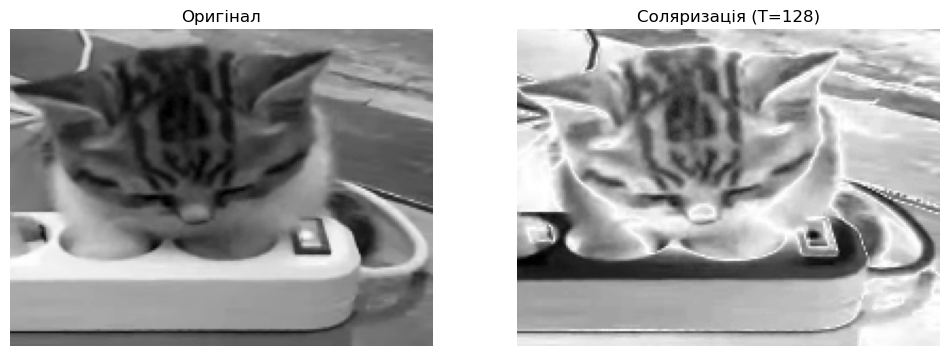

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Шлях до файлу
image_path = 'src/Color.png' 

# 1. Зчитування
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Помилка: Нема зображення {image_path}")
else:
    # Поріг соляризації (можна міняти, зазвичай 128)
    T = 128

    # Створюємо копію, щоб не псувати оригінал в пам'яті
    image_solarized = image_gray.copy()

    # Створюємо маску: знаходимо всі пікселі, що яскравіші за T
    high_pixels_mask = (image_gray >= T)

    # Інвертуємо лише ті пікселі, що потрапили в маску
    image_solarized[high_pixels_mask] = 255 - image_solarized[high_pixels_mask]
    
     # Візуалізація
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_solarized, cmap='gray')
    plt.title(f'Соляризація (T={T})')
    plt.axis('off')

    plt.show()
    
    cv.imwrite(f'src/Color_solarized.png', image_solarized)

<b>Відозміна гістограми</b>

<a href="https://habr.com/ru/articles/244507/">5. Еквалізація гістограми 1</a>
<p>І ще приклад <a href="https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html">тут</a></p>

Еквалізація (вирівнювання) гістограми — це алгоритм, що автоматично підвищує глобальний контраст зображення. Метод базується на аналізі гістограми, тобто розподілу пікселів за рівнями яскравості (від 0 до 255). Головна ідея полягає у трансформації початкового розподілу яскравостей до більш рівномірного стану. Це реалізується шляхом "розтягування" найчастіших діапазонів яскравості та "стискання" рідкісних. Як наслідок, деталі стають чіткішими: темні ділянки стають глибшими, а світлі — яскравішими. Цей підхід є найбільш ефективним для зображень із низьким контрастом, а також для надто темних чи засвічених фото.

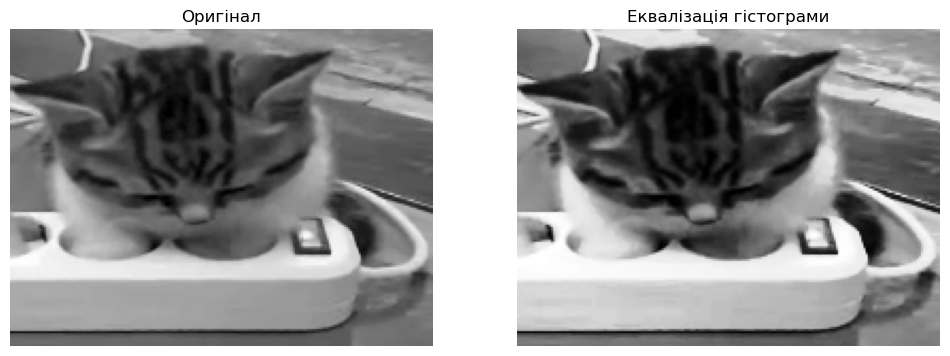

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'src/Color.png' 

image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Нема зображення! {image_path}")
else:
    image_equalized = cv.equalizeHist(image_gray)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('Еквалізація гістограми')
    plt.axis('off')

    plt.show()
    
    cv.imwrite('src/Color_equalized.png', image_equalized)

<a href="https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a">6. Оцінка гістограми</a><br>
<a href="https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html">Ще одне посилання</a>

Аналіз гістограми — це дослідження графіка, що відображає частоту появи пікселів різної яскравості (від 0 до 255). Це дозволяє миттєво оцінити властивості зображення: чи є воно занадто темним, пересвіченим  або тьмяним. Також гістограма допомагає обрати ідеальний поріг для бінаризації. Якщо графік має два чіткі піки (бімодальний розподіл: один для фону, інший для об'єкта), то найкращий поріг знаходиться в "долині" (мінімумі) між ними.

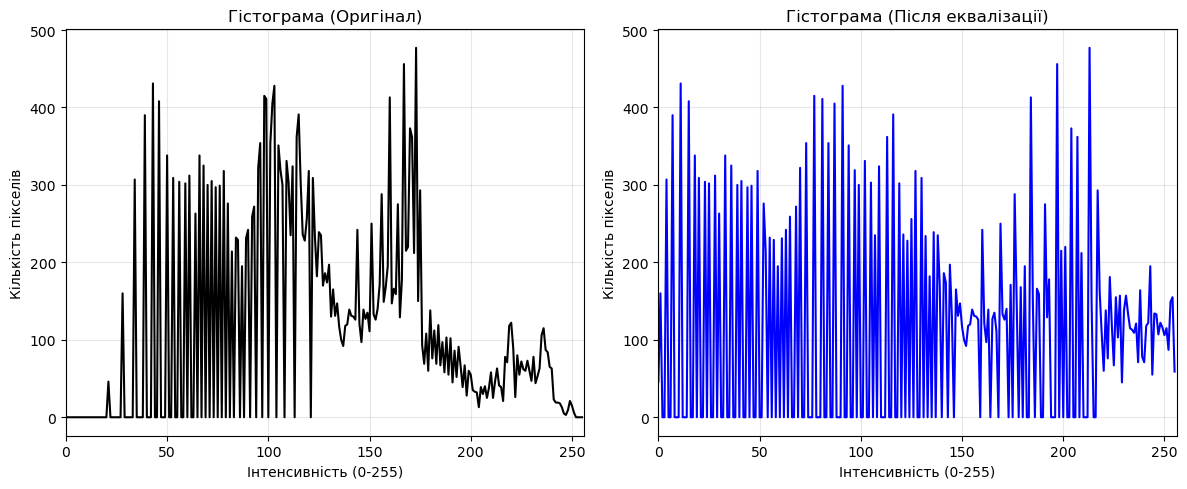

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = 'src/Color.png' 
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if image_gray is None:
    print(f"Нема зображення! {image_path}")
else:
    hist_original = cv.calcHist([image_gray], [0], None, [256], [0, 256])
    image_equalized = cv.equalizeHist(image_gray)
    hist_equalized = cv.calcHist([image_equalized], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 5))

    # Лівий графік
    plt.subplot(1, 2, 1)
    plt.plot(hist_original, color='black')
    plt.title('Гістограма (Оригінал)')
    plt.xlabel('Інтенсивність (0-255)')
    plt.ylabel('Кількість пікселів')
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)

    # Правий графік
    plt.subplot(1, 2, 2)
    plt.plot(hist_equalized, color='blue')
    plt.title('Гістограма (Після еквалізації)')
    plt.xlabel('Інтенсивність (0-255)')
    plt.ylabel('Кількість пікселів')
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

<b>Контрольні запитання</b>

1. У чому полягає сенс градаційних перетворень?

Суть градаційних перетворень зводиться до модифікації зображення шляхом зміни значень інтенсивності (яскравості) його пікселів.
Ці методи належать до класу точкових операцій (розмір вікна 1x1). Це означає, що вихідна яскравість пікселя ($s$) визначається виключно його вхідним значенням ($r$) за певною функціональною залежністю:


$$s = T(r)$$

2. На чому ґрунтуються гістограмні методи?

В основі гістограмних методів лежить статистичний аналіз глобального розподілу яскравостей пікселів у межах усього зображення.
На противагу градаційним перетворенням, що працюють з кожним пікселем ізольовано, ці методи спираються на аналіз гістограми — частотного графіка, який демонструє кількість пікселів для кожного рівня інтенсивності (діапазон 0–255).
Отримана глобальна статистика використовується для корекції зображення, зокрема:

Еквалізація гістограми: Розширення динамічного діапазону яскравості для підвищення загального контрасту.

Аналіз гістограми: Визначення оптимальних порогових значень (наприклад, для задач бінаризації).